## 匯入文本

#### 使用 Google Text-to-Speech（gTTS）將文字轉換為語音。
#### 生成的語音保存為 MP3 格式的音頻檔案。
使用資料為 APPLE Q4 2024 Earnings Call

In [1]:
from gtts import gTTS

def text_to_speech_from_files(txt_file1, txt_file2, filename1="apple_audio1.mp3", filename2="apple_audio2.mp3"):
    # 讀取第一個 .txt 文件內容
    with open(txt_file1, 'r') as file1:
        text1 = file1.read()

    # 讀取第二個 .txt 文件內容
    with open(txt_file2, 'r') as file2:
        text2 = file2.read()

    # 將第一個文件的文字轉換為語音並保存
    tts1 = gTTS(text=text1, lang='en')
    tts1.save(filename1)
    print(f"Audio saved as {filename1}")

    # 將第二個文件的文字轉換為語音並保存
    tts2 = gTTS(text=text2, lang='en')
    tts2.save(filename2)
    print(f"Audio saved as {filename2}")

    return filename1, filename2

# 假設你的兩個 .txt 文件名稱分別為 "input_text1.txt" 和 "input_text2.txt"
txt_file1 = "/Users/andrewhsu/Documents/FinTech_emotion/appleCEO_talk.txt"
txt_file2 = "/Users/andrewhsu/Documents/FinTech_emotion/appleCEO_QA.txt"

audio_file1, audio_file2 = text_to_speech_from_files(txt_file1, txt_file2)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/andrewhsu/Documents/FinTech_emotion/appleCEO_talk.txt'

## 分析文本情緒

#### 通過 transformers 庫中的情緒分析模型分析兩個長文本的情緒
#### 情緒結果映射到 Russell 情緒模型 中的 愉悅度 和 激發度。
- 正向情緒（"POSITIVE"）：通常對應較高的愉悅度（正值），並假設激發度較低（例如愉悅度的 80%）。
- 負向情緒（"NEGATIVE"）：通常對應較低的愉悅度（負值），並假設激發度較高（例如愉悅度的 120%）。

In [62]:
from transformers import pipeline

# 使用長文本支持的模型
emotion_analyzer = pipeline("sentiment-analysis", model="allenai/longformer-large-4096")

def analyze_sentiment_from_files(txt_file1, txt_file2):
    # 讀取第一個 .txt 文件內容
    with open(txt_file1, 'r') as file1:
        text1 = file1.read()

    # 讀取第二個 .txt 文件內容
    with open(txt_file2, 'r') as file2:
        text2 = file2.read()

    # 使用情緒分析模型對文本進行分析
    result1 = emotion_analyzer(text1)
    result2 = emotion_analyzer(text2)
    
    # 解析第一個文本的情緒結果
    sentiment1 = result1[0]
    label1 = sentiment1['label']
    score1 = sentiment1['score']
    
    # 根据情绪标签映射到 Russell 情绪模型
    if label1 == "POSITIVE":
        pleasure1 = score1  # 正向情绪，愉悦度较高
        arousal1 = score1 * 0.8  # 激发度为愉悦度的某种程度（比如 80%）
    else:  # "NEGATIVE"
        pleasure1 = -score1  # 负向情绪，愉悦度较低（为负）
        arousal1 = score1 * 1.2  # 激发度增加（可以进一步加权以增强激发度）

    # 解析第二個文本的情緒結果
    sentiment2 = result2[0]
    label2 = sentiment2['label']
    score2 = sentiment2['score']
    
    # 根据情绪标签映射到 Russell 情绪模型
    if label2 == "POSITIVE":
        pleasure2 = score2  # 正向情绪，愉悦度较高
        arousal2 = score2 * 0.8  # 激发度为愉悦度的某种程度（比如 80%）
    else:  # "NEGATIVE"
        pleasure2 = -score2  # 负向情绪，愉悦度较低（为负）
        arousal2 = score2 * 1.2  # 激发度增加（可以进一步加权以增强激发度）

    return (pleasure1, arousal1), (pleasure2, arousal2)

# 假设你的两個 .txt 文件名称分别为 "input_text1.txt" 和 "input_text2.txt"
txt_file1 = "/Users/andrewhsu/Documents/FinTech_emotion/appleCEO_talk.txt"
txt_file2 = "/Users/andrewhsu/Documents/FinTech_emotion/appleCEO_QA.txt"

(pleasure1, arousal1), (pleasure2, arousal2) = analyze_sentiment_from_files(txt_file1, txt_file2)

# 输出情绪分析结果
print(f"Text 1 - Pleasure: {pleasure1}, Arousal: {arousal1}")
print(f"Text 2 - Pleasure: {pleasure2}, Arousal: {arousal2}")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-large-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use mps:0


Text 1 - Pleasure: -0.6256961226463318, Arousal: 0.7508353471755981
Text 2 - Pleasure: -0.5496312975883484, Arousal: 0.659557557106018


## 

## 繪製 Russell's 情緒模型
並將兩個文本的情緒映射到模型中，顯示它們在愉悅度（Pleasure）和激發度（Arousal） 空間中的位置。

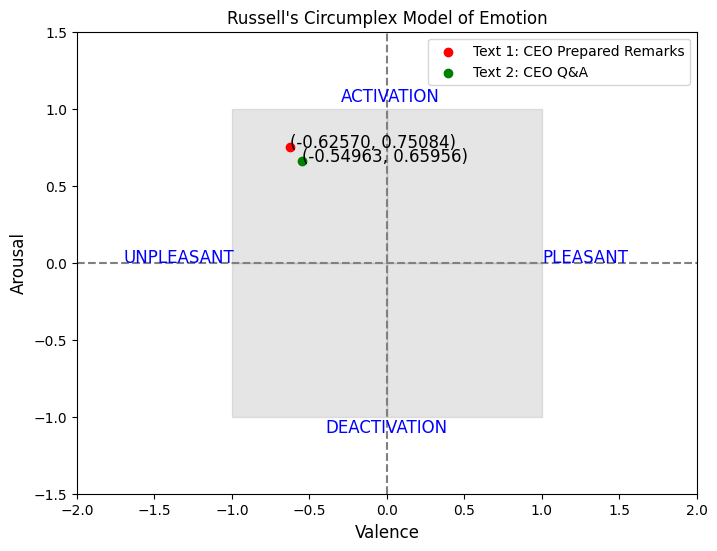

In [64]:
import matplotlib.pyplot as plt
import numpy as np

def plot_russell_model(pleasure1, arousal1, pleasure2, arousal2):
    # 绘制Russell模型
    plt.figure(figsize=(8, 6))

    # 绘制愉悦度和激发度的范围
    plt.xlim(-2, 2)  # 更新愉悦度范围
    plt.ylim(-1.5, 1.5)  # 更新激发度范围

    # 在特定区域填充灰色背景
    plt.fill_betweenx([0, 1], 0, 1, color='gray', alpha=0.2)
    plt.fill_betweenx([0, 1], -1, 0, color='gray', alpha=0.2)
    plt.fill_betweenx([-1, 0], 0, 1, color='gray', alpha=0.2)
    plt.fill_betweenx([-1, 0], -1, 0, color='gray', alpha=0.2)

    # 绘制第一组愉悦度和激发度的点
    plt.scatter(pleasure1, arousal1, color='red', label=f"Text 1: CEO Prepared Remarks")
    
    # 绘制第二组愉悦度和激发度的点
    plt.scatter(pleasure2, arousal2, color='green', label=f"Text 2: CEO Q&A")
    
    # 设置标题和标签
    plt.title("Russell's Circumplex Model of Emotion")
    plt.xlabel("Valence", fontsize=12)
    plt.ylabel("Arousal", fontsize=12)

    # 绘制愉悦度和激发度的描述
    plt.axhline(0, color='gray', linestyle='--')  # 激发度中线
    plt.axvline(0, color='gray', linestyle='--')   # 愉悦度中线
    
    # 添加情绪点的标签，并保留三位小数
    plt.text(pleasure1, arousal1, f"({pleasure1:.5f}, {arousal1:.5f})", fontsize=12, color='black')
    plt.text(pleasure2, arousal2, f"({pleasure2:.5f}, {arousal2:.5f})", fontsize=12, color='black')

    # 在指定坐标位置添加额外的文字
    plt.text(1, 0, "PLEASANT", fontsize=12, color='blue')
    plt.text(-1.7, 0, "UNPLEASANT", fontsize=12, color='blue')
    plt.text(-0.3, 1.05, "ACTIVATION", fontsize=12, color='blue')
    plt.text(-0.4, -1.1, "DEACTIVATION", fontsize=12, color='blue')

    # 显示图形
    plt.legend()
    plt.grid(False)
    plt.show()
# 绘制图形
plot_russell_model(pleasure1, arousal1, pleasure2, arousal2)
